# Overview

The data that we'll be working with for this project has been obtained from the U.S. Energy Information Administration, an official government site that offers an extensive collection of data in regards to energy production, consumption, and usage. The data from this site goes back as far as 1949, while the most recent complete dataset is from 2016.

Since this site offers far more data than anything required of this capstone, I will narrowing down the subject to 3 particular questions.
1. How has the United States’ patterns of production and consumption changed between this time?
2. What steps is the United States making towards sustainable, renewable energy in regards to production?
3. Which sectors have been the driving force behind our insatiable demand for energy?

In order to address these questions, we’ll require a particular assortment of datasets. The ones that we will be utilizing to address the above questions will be
1. Primary Energy Production by Source
2. Primary Energy Consumption by Source
3. Primary Energy Imports by Source
4. Primary Energy Exports by Source and Total Net Imports
5. Energy Consumption by Sector

From the first two datasets, we will be examining the total production and consumption columns to tackle the first question, and examine the individual sources of production to answer the second. The next two datasets will be utilized to get a better understanding of the United States’ trends of importing vs exporting energy to sustain our needs. Our final dataset will provide us the information to compare four distinct categories that require energy and allow us to see if any category has driven growth more so than the others.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import os
os.chdir('C:\\Users\\nu\\Desktop\\Thinkful\\Bootcamp\\Capstone')
%matplotlib inline

In [2]:
# creates array of rows to skip in the dataset
skip = list(range(10))
skip.append(11)

# imports the files that we need
annual_production = (pd.ExcelFile('Table_1.2_Primary_Energy_Production_by_Source.xlsx')).parse('Annual Data', skiprows = skip)
annual_consumption = (pd.ExcelFile('Table_1.3_Primary_Energy_Consumption_by_Source.xlsx')).parse('Annual Data', skiprows = skip)
imports = (pd.ExcelFile('Table_1.4a_Primary_Energy_Imports_by_Source.xlsx')).parse('Annual Data', skiprows = skip)
exports = (pd.ExcelFile('Table_1.4b_Primary_Energy_Exports_by_Source_and_Total_Net_Imports.xlsx')).parse('Annual Data', skiprows = skip)
sectors = (pd.ExcelFile('Table_2.1_Energy_Consumption_by_Sector.xlsx')).parse('Annual Data', skiprows = skip)

# Total Energy Production and Consumption

**
Q1: In an ideal sustainable society, we would want to ensure that we are producing enough energy to meet our demands. The question that I would like to examine is how sustainable is the current supply and demand of energy in the United States?**

[1949, 2016, -20, 60]

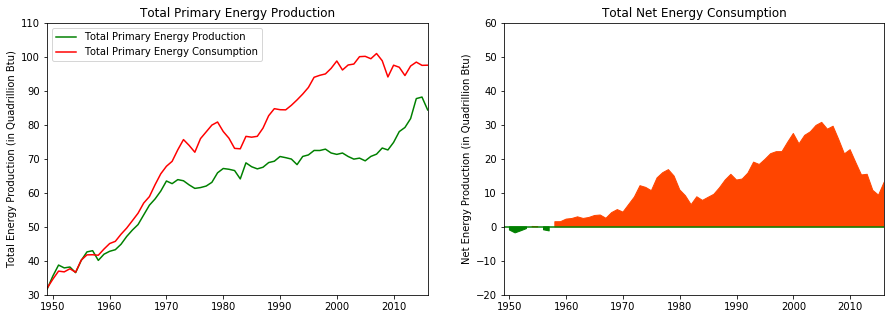

In [12]:
plt.rcParams['figure.figsize'] = [15,5]

# importing data from our sources
x = annual_production['Annual Total']
y1 = annual_production['Total Primary Energy Production']
y2 = annual_consumption['Total Primary Energy Consumption']
y3 = y2 -y1

# plots consumption and production patterns
plt.subplot(1,2,1)
plt.title('Total Primary Energy Production')
plt.axis([1949,2016, 30, 110])
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.plot(x, y1, color = 'green')
plt.plot(x, y2, color = 'red')
plt.legend(loc='upper left')

# plots net energy consumption
plt.subplot(1,2,2)
plt.title('Total Net Energy Consumption')
plt.axhline(0, color='green', linestyle = '-')
plt.ylabel('Net Energy Production (in Quadrillion Btu)')
plt.fill_between(x, 0, y3, where=y3 > 0, color = 'orangered')
plt.fill_between(x, 0, y3, where=y3 < 0, color = 'green')
plt.axis([1949,2016, -20, 60])

By examining the production and consumption patterns over the period between 1949 and 2016, we can observe that for the first decade of the observed period, there was a point where the United States was producing enough, if not slightly more energy than necessary. However, after that point, the general trend is that consumption has been increasing at a far greater rate than production, with our current peak energy deficit occurring in 2006. However, we do see a stalling in consumption and sharp rise in the decade since, which is certainly a step in the right direction.

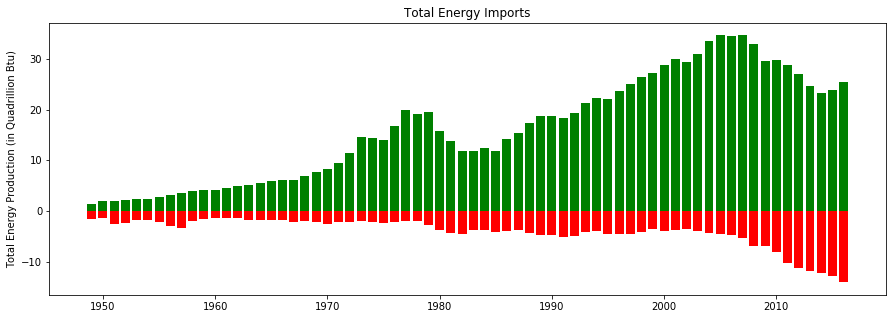

In [4]:
# importing data into axes
x = annual_production['Annual Total']
y1 = imports['Total Primary Energy Imports']
y2 = exports['Total Energy Exports'] * -1
y3 = exports['Total Energy Net Imports']

# visualizes differences between energy imports and exports
plt.title('Total Energy Imports')
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.bar(x, y1, color = 'green')
plt.bar(x, y2, color = 'red')
plt.legend(loc='upper left')

From the previous diagrams, we have seen that our rate of production can no longer suffice for our rate of consumption. Due to this, we have shifted  a self-sustainable model to one that relies on increasing energy imports. Fortunately, it would seem as though production has mostly increased in the decade since, our dependence on energy on imports has taken a drop., and our exports have been increasing.

All that we can conclude is that throughout this period, our patterns of energy consumption have grown at a much faster rate than production, and we have had to fill that gap by increasing the amount of energy that we need to import (which leads to even more worldwide energy consumption in the form of transportation). While energy production has increased rapidly in the last decade and may continue to do so, it’s far too early to determine if that trend will remain, but we should hope that it will.

# Focus on Sustainable Production

**Q2. In order to cope with our ever-increasing energy demands, what steps have we taken in order to address production and how sustainable are the practices that we're adopting? In addition, based on previous trends, what should we expect in the future?**

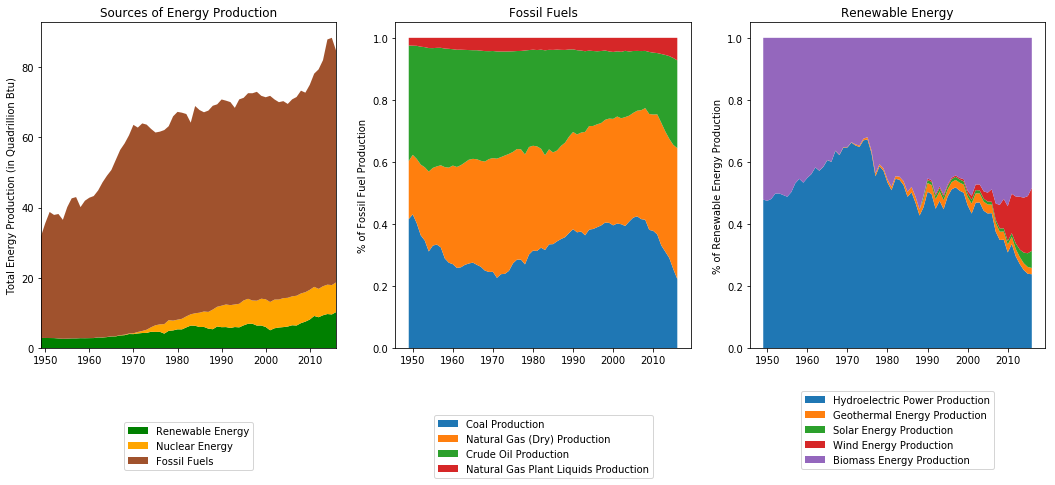

,Annual Total,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,Wind Energy Production,Biomass Energy Production,Total Renewable Energy Production,Total Primary Energy Production
0,1949,11.973882,5.377243,10.683252,0.713799,28.748176,0.000000,1.424722,0.000000,0.0000,0.000000,1.549262,2.973984,31.722160
67,2016,14.667089,27.649297,18.548383,4.770102,65.634870,8.426753,2.472442,0.209604,0.5697,2.095595,5.003515,10.350856,84.412479


In [5]:
plt.rcParams['figure.figsize'] = [18,6]

# extracts data from files
x = annual_production['Annual Total']
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Nuclear Electric Power Production']
y3 = annual_production['Total Fossil Fuels Production']
c = annual_production.columns[:]
f = {}

# plots sources of energy
plt.subplot(1,3,1)
plt.stackplot(x, y1, y2, y3, colors = ['green', 'orange', 'sienna'], 
             labels = ['Renewable Energy', 'Nuclear Energy', 'Fossil Fuels'])
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.title('Sources of Energy Production')
plt.xlim((1949, 2016))

# plots fossil fuels
plt.subplot(1,3,2)
for i in range(1,5):
    f[i] = annual_production[c[i]] / annual_production[c[5]]
plt.stackplot(x, f[1],f[2],f[3],f[4],
             labels = (c[1],c[2],c[3],c[4]))
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.title('Fossil Fuels')
plt.ylabel('% of Fossil Fuel Production')

# plots renewable energy
plt.subplot(1,3,3)
annual_production = annual_production. replace('Not Available',0)
for i in range(7,12):
    f[i] = annual_production[c[i]] / annual_production[c[12]]
plt.stackplot(x, f[7],f[8],f[9],f[10],f[11],
             labels = (c[7],c[8],c[9],c[10],c[11]))
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25))
plt.title('Renewable Energy')
plt.ylabel('% of Renewable Energy Production')
plt.show()

pd.concat([annual_production.head(1),annual_production.tail(1)])

From the diagrams above, we can see that renewable sources have been steadily increasing, nuclear energy has increased to practically match renewable production, but has been stagnant for the past two decades and will likely remain that way unless advances in the field are made in regards to safety and public interest. However, it’s clear that for the entire observed period, fossil fuels have been the dominant source of energy production in the United States (and the world) and considering that we are now extracting twice as much per year, it seems as though it will remain that way, at least for the near future.

If we break down fossil fuels and renewable energy even further, we can see that coal and hydroelectric power have either stagnated or decreased in overall production. On the other hand, we have seen remarkable strides being made in the field of renewable energy in the form of solar, geothermal, and especially wind.

Text(0.5,1,'Renewable Energy in 2016')

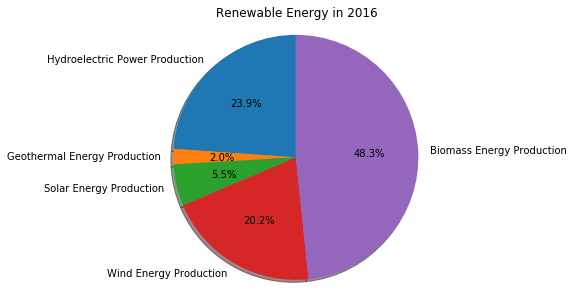

In [6]:
plt.rcParams['figure.figsize'] = [10,5]

sources = list(annual_production.iloc[-1, 7:12])
labels = list(c[7:12])

fig1, ax1 = plt.subplots()
ax1.pie(sources, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Renewable Energy in 2016')

From the 3rd figure in the previous section, we saw that biomass has accounted for roughly 50% of all energy production through most of the observed period, but the role of hydroelectric, wind, and solar has shifted throughout this time. By examining the sources of renewable energy in 2016, we can see that hydroelectric power now accounts for less overall production than solar and wind energy, which are relatively recent developments. Based on the trends presented in our figures, we can infer that the bulk of future renewable energy production in the near future will be driven by an increase in wind, solar, and additional biomass. 

Regression line: 0.000828563503025x + -1.55364774096
R-squared value: 0.853151552543


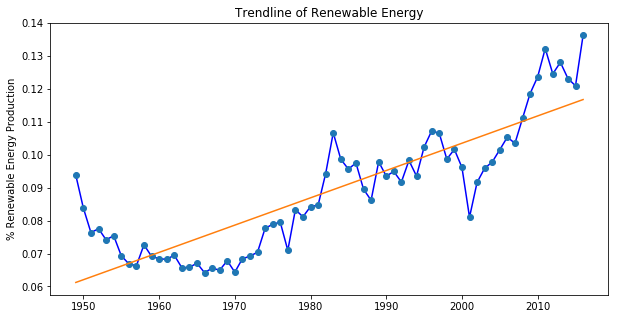

In [7]:
plt.rcParams['figure.figsize'] = [10,5]

# constructs a best-fit line
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Total Fossil Fuels Production']
y3 = y1 / (y1 + y2)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y3)
line = slope*x+intercept

# creates the plot
plt.title('Trendline of Renewable Energy')
plt.ylabel('% Renewable Energy Production')
plt.plot(x, y3, color = 'blue')
plt.plot(x,y3,'o', x, line)

# return the linear regression equation and the r-squared value
print('Regression line: {}x + {}'.format(str(slope),str(intercept)))
print('R-squared value: {}'.format(str(r_value)))

While renewable energy production has not increased at the same pace as fossil fuels in total production, it is important to note that the rate of growth relative to total energy production has been increasing. Based on the linear regression model constructed above, it’s clear that we are making some progress towards a sustainable future, but unfortunately, the rate of growth suggests that if our goal is a fully renewable country, we are about 1000 years away from that.

<div class="alert alert-block alert-warning">
Note that this model could be improved by comparing it to an exponential regression curve instead, as we could argue that sustainability in renewable energy production really started taking off in 1970 with the emergence of sources like nuclear, geothermal, wind, and solar around this time period.
</div>

Now in order to address the original question on how we’re fulfilling demand, we can see that production in both renewables and fossil fuels have risen dramatically, doubling their figures in a span of 60 years. Nuclear energy emerged in the 1960s-1980s, but it seems as though interest in expanding nuclear production has halted due to concerns about the stability and environmental damage that it can cause. Newer forms of renewable energy such as wind and solar are making rounds in the headlines about increasing capacity and decreasing costs of production, but we’ll simply have to wait to see if that is reflected in increased production in the future. Overall, it seems as though we are making small strides towards renewability, but are willing to turn to fossil fuels and increased exports in order to keep up with demand.

# Examining Energy Consumption By Sector

**Q3: Now that we’ve had the chance to look at the means of producing energy in the United States, it’s time to address the demand side of the equation. Where does it all come from, and are there certain sectors that demand more of it than others?**

Our data from the US Energy Information Administration breaks up the sectors of energy consumption into 5 distinct categories: residential, commercial, industrial, transportation, and electric.

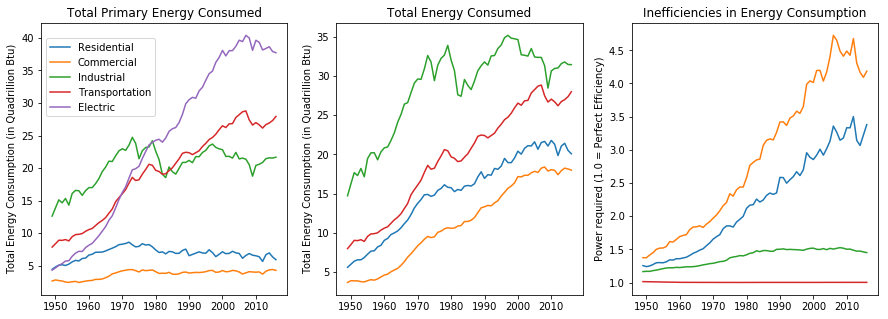

,Annual Total,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
0,1949,4460.434,5599.250,2668.869,3668.816,12633.386,14723.587,7879.509,7990.015,4339.470,-0.165,31981.503
67,2016,5942.037,20082.872,4300.724,18001.951,21674.210,31462.303,27930.642,28005.771,37705.285,30.424,97583.322


In [8]:
plt.rcParams['figure.figsize'] = [15,5]

# loading sectors into a dictionary
x = sectors['Annual Total']
d = {}
for i in range(1,10):
    d[i] = sectors.iloc[:,i]/1000
d[1].name = 'Residential'
d[3].name = 'Commercial'
d[5].name = 'Industrial'
d[7].name = 'Transportation'
d[9].name = 'Electric'

# plotting primary energy consumption
plt.subplot(1,3,1)
plt.title('Total Primary Energy Consumed')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
for i in range(1,10,2):
    plt.plot(x,d[i])
plt.legend(loc='center left', bbox_to_anchor=(0, 0.8))

# plotting total energy consumption
plt.subplot(1,3,2)
plt.title('Total Energy Consumed')
plt.ylabel('Total Energy Consumption (in Quadrillion Btu)')
for i in range(2,9,2):
    plt.plot(x,d[i])

# plotting energy inefficiency
plt.subplot(1,3,3)
plt.title('Inefficiencies in Energy Consumption')
plt.ylabel('Power required (1.0 = Perfect Efficiency)')
e = {}
for i in range(1,5):
    e[i] = (d[2*i] - d[2*i-1]) / d[2*i-1] + 1
    plt.plot(x, e[i])    
plt.show()

# print first and last rows of sectors
pd.concat([sectors.head(1),sectors.tail(1)])

So if you’re thinking, “Wow, the electric sector has grown exponentially, but why isn’t it shown in the other two graphs?”, you wouldn’t be the first to make that mistake. The electric sector is meant to be the summation of storing energy and delivering it to the other 4 sectors, primarily residencies and commercial buildings, so it's included as a percentage of the other four categories in the other two graphs. In order to explain how the industrial and transportation sector are so efficient in comparison, it can be illustrated by the type of fuel that you put into your car (this is 2018, so electric cars are still a rare sight) and that will fuel your transportation needs with perfect efficiency (energy supplied = energy used). The same concept applies to trains, trucks, and factories, but not to the vast majority of households or businesses where electric plants produce energy and lose energy in the delivery process through transportation and power grids.

Now that that’s out of the way, we can observe that the total amount of energy consumed by all sectors is indeed increasing, but notably, the amount of primary energy consumed in households and the commercial sector have actually dropped at the expense of skyrocketing energy production and loss in delivery from the electric sector. While all sectors have grown in energy consumption between 1949 and 2016, some sectors seem to have increased in total consumption more than the others. Considering that this time period introduced myriad technological advances aimed at most households, it’s not all that surprising to see this result. It’s clear that the industrial sector has not grown at the same rate as the other 3 categories, but it is still the largest source of energy consumption as of 2016; at least until the transportation sector overtakes it if current trends persist.

In [9]:
t1 = d[2]
t2 = d[4]

print('Residential vs Commercial use t-test: ' + str(ttest_ind(t2[1:], t1[1:], equal_var=False)))

Residential vs Commercial use t-test: Ttest_indResult(statistic=-4.696972712819349, pvalue=6.5489603406813567e-06)


From a preliminary t-test between residential and commerical usage, we get a t-value of -4.6970 and a p-value of .0000065, meaning that there is no significant difference between these two sectors.

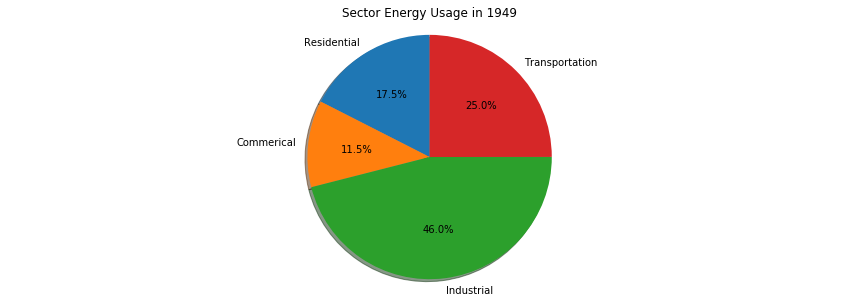

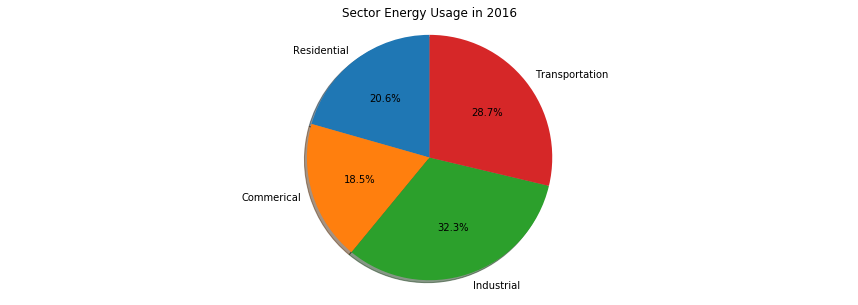

In [10]:
# creates the pie chart
def pie_plot(timeframe, year):
    fig1, ax1 = plt.subplots()
    ax1.pie(timeframe, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title('Sector Energy Usage in ' + str(year))
    
# creates the labels and correct input data
labels = ['Residential', 'Commerical', 'Industrial', 'Transportation']    
pie_plot(([d[2][0], d[4][0], d[6][0], d[8][0]]), 1949)
pie_plot(([d[2][67], d[4][67], d[6][67], d[8][67]]), 2016)

So, this should hopefully illustrate a much clearer picture of how much residential, commercial, and transportation power usage has increased in the observed period. Now, if we think carefully about the time period and determine what caused the spike in energy consumption, we can think about all of the electric appliances we have now that didn't exist in 1949 such as refrigerators, ovens, air conditioning, televisions, computers, hair dryers and so on. Obviously, we don't produce energy (except for the <1% that use household solar) so we move the production and storage of energy further away and build power lines to deliver it. 

The only way that this energy inefficiency can really be dramatically reduced is by localizing energy production, and closing the distance between energy production and consumption like household solar, and leveraging local environmental assets in favor of transporting energy from other states, or countries. One question that this now brings up is if we should expect to see power consumption increase at the same rate, or have we reached the point where we cannot consume more power than we already do. 

# Conclusion

Well, I hope you enjoyed this broad overview on the State of Energy. To sum up the major points of this project,
1. The United States’s supply and demand for energy have sharply risen in the period between 1949 and 2016, and because of this, we have grown much more dependent on other countries to import energy to fulfill our demand.
2. The United States has taken some action in regards to shifting to more sustainable sources of energy, but the progress has been relatively slow, and the fact remains that we are still consuming and extracting more energy with practically each successive year.
3. The amount of power that residencies and commercial buildings directly consume has been decreasing, but the total power consumption caused by these two sectors has actually outpaced the average increase of energy usage in the United States.

So when all is said and done, where do we go with this? Well, there are many questions and potential avenues that arose as I was constructing this project. So if you would like to expand upon this project, here are some thoughts to consider:
1. On the topic of importing and exporting energy, it obviously takes fuel and energy to transport whether it’s via boat, train, or plane. What would our total power consumption look like if we had also taken those into account?
2. We can see from question 3 that there is a lot of energy being lost in the extraction, conversion, and transportation of energy. Now, we can break down the import and export process down to the state level and see who are the biggest consumers and producers of energy. That might help us better understand how much energy is being lost in the transportation process. 


# Source:

https://www.eia.gov/totalenergy/data/monthly/index.php#consumption 